In [23]:
from sklearn import ensemble, metrics, tree
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve

In [48]:
def boost_train(X, y, n=50, learning_rate=1):
    boost = ensemble.AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=2), n_estimators=n, learning_rate=learning_rate)
    boost.fit(X, y)
    return boost

def get_classification_score(boost, X, y):
    return boost.score(X, y)

def get_f1_score(boost, X, y, average='macro'):
    yp = boost.predict(X)
    return metrics.f1_score(y, yp, average=average)


def plot_validation_curve(X, y, param_name, param_range, cross_validation=5, fig_name="validation_curve.png",
                          xscale='linear', scorer=None):
    boost = ensemble.AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=2))
    tr_sc, tst_sc = model_selection.validation_curve(boost, X, y, param_name=param_name,
                                                            param_range=param_range, cv=cross_validation, scoring=scorer, 
                                                     verbose=2, n_jobs=-1)
    plt.figure()
    plt.xticks(param_range)
    plt.xlabel(param_name)
    plt.xscale(xscale)
    plt.ylabel("Score")
    plt.plot(param_range, np.mean(tr_sc, axis=1), label='Training score')
    plt.plot(param_range, np.mean(tst_sc, axis=1), label='Cross-validation score')
    plt.legend(loc="best")
    plt.title('Adaboost - Validation Curve')
    
    plt.savefig(fig_name)
    plt.show()
    return tr_sc, tst_sc

## Phishing Website dataset analysis

In [37]:
from scipy.io.arff import loadarff 

raw_data = loadarff('Training Dataset.arff')
ph_data = pd.DataFrame(raw_data[0])
ph_data.head()

for var in ph_data.columns.values:
    ph_data[var] = pd.Categorical(ph_data[var])
    ph_data[var] = ph_data[var].cat.codes

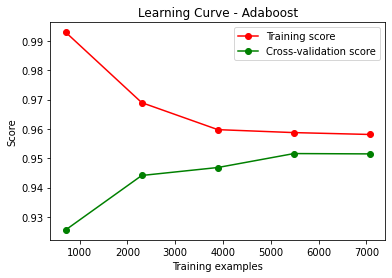

In [38]:
y = ph_data.Result.values
X = ph_data.drop(['Result'], axis=1)
fig, ax = plt.subplots()
ax.set_title("Learning Curve - Adaboost")
ax.set_xlabel("Training examples")
ax.set_ylabel("Score")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)
boost = boost_train(X_train, y_train)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(boost, X_train, y_train, cv=5,
                       return_times=True)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
ax.legend(loc="best")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:   40.0s remaining:   40.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


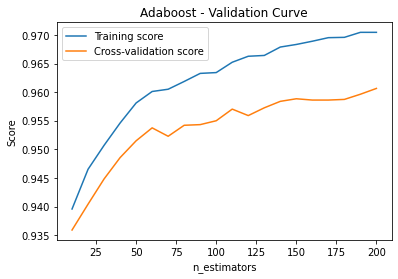

(array([[0.93583039, 0.94318021, 0.93724382, 0.94077739, 0.94078575],
        [0.9454417 , 0.94812721, 0.94685512, 0.94473498, 0.94742793],
        [0.95250883, 0.95208481, 0.95067138, 0.94996466, 0.94827586],
        [0.95321555, 0.95618375, 0.95632509, 0.9560424 , 0.95124364],
        [0.95816254, 0.96028269, 0.95929329, 0.9570318 , 0.95576597],
        [0.96042403, 0.96240283, 0.96056537, 0.96028269, 0.95689655],
        [0.95971731, 0.9639576 , 0.96169611, 0.95943463, 0.95774449],
        [0.96084806, 0.96537102, 0.96155477, 0.96183746, 0.95972301],
        [0.96240283, 0.96636042, 0.96084806, 0.96452297, 0.96226682],
        [0.96310954, 0.96650177, 0.96169611, 0.96254417, 0.96325608],
        [0.96282686, 0.96904594, 0.96353357, 0.96621908, 0.96452798],
        [0.96409894, 0.97003534, 0.96424028, 0.96650177, 0.9665065 ],
        [0.96522968, 0.97060071, 0.96466431, 0.96664311, 0.96495195],
        [0.96650177, 0.97187279, 0.96664311, 0.96819788, 0.96622386],
        [0.96805654,

In [28]:
plot_validation_curve(X_train, y_train, 'n_estimators', range(10, 210, 10), 
                      fig_name="max_depth_vc.png")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:    5.3s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.3s finished


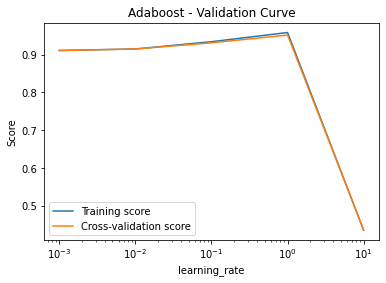

(array([[0.90473498, 0.91674912, 0.91250883, 0.9054417 , 0.91478236],
        [0.91477032, 0.91674912, 0.91250883, 0.91434629, 0.91478236],
        [0.9345583 , 0.9355477 , 0.93286219, 0.93328622, 0.93329565],
        [0.95816254, 0.96028269, 0.95929329, 0.9570318 , 0.95576597],
        [0.43816254, 0.42572438, 0.43886926, 0.43773852, 0.43824194]]),
 array([[0.90559638, 0.90616167, 0.92312041, 0.90276993, 0.91402715],
        [0.91407575, 0.90616167, 0.92312041, 0.91577162, 0.91402715],
        [0.93103448, 0.92481628, 0.93668739, 0.93386094, 0.92816742],
        [0.95195025, 0.94347089, 0.95251555, 0.95251555, 0.95701357],
        [0.43866591, 0.42736009, 0.43583946, 0.44036179, 0.43834842]]))

In [29]:
plot_validation_curve(X_train, y_train, 'learning_rate', [1e-3, 1e-2, 1e-1, 1, 10], 
                      fig_name="max_depth_vc.png", xscale="log")

In [31]:
boost = boost_train(X_train, y_train, n=200, learning_rate=1)
get_classification_score(boost, X_test, y_test)

0.9552238805970149

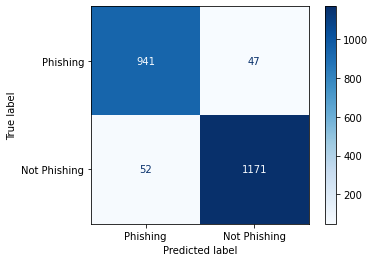

In [32]:
ax = plot_confusion_matrix(boost, X_test, y_test,
                                 display_labels=['Phishing',
                                 'Not Phishing'],cmap=plt.cm.Blues, values_format='d')
plt.show()

In [33]:
import pickle
pickle.dump(boost, open("Boost D2.sav", 'wb'))

## Census Dataset Analysis

In [39]:
data = pd.read_csv("adult.data", sep='\t', header=None, 
                   names=["age", "workclass", "fnlwgt", "education", 
                          "education-num", "marital-status", "occupation",
                          "relationship", "race", "sex", "capital-gain", 
                          "capital-loss", "hours-per-week", "native-country", 
                          "output"])
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


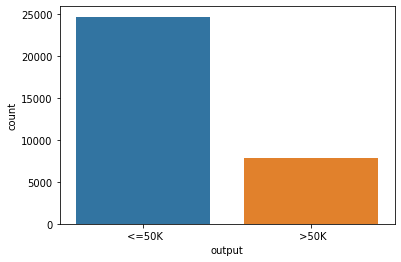

In [40]:
sns.countplot(x="output", data=data)

In [41]:
categorical_vars =["workclass", "education", "marital-status", "occupation", "relationship", 
                   "race", "sex", "native-country"]
df = data.copy()
for var in categorical_vars:
    df[var] = pd.Categorical(df[var])
    df[var] = df[var].cat.codes

continuous_vars = ["fnlwgt", "capital-gain", "capital-loss"]
for var in continuous_vars:
    df[var] = (df[var]-df[var].mean())/df[var].std()

y = df.output.values
X = df.drop(['output'], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,39,7,-1.063594,9,13,4,1,1,4,1,0.148451,-0.216656,40,39,<=50K
1,50,6,-1.008692,9,13,2,4,0,4,1,-0.145918,-0.216656,13,39,<=50K
2,38,4,0.245075,11,9,0,6,1,4,1,-0.145918,-0.216656,40,39,<=50K
3,53,4,0.425795,1,7,2,6,0,2,1,-0.145918,-0.216656,40,39,<=50K
4,28,4,1.408154,9,13,2,10,5,2,0,-0.145918,-0.216656,40,5,<=50K


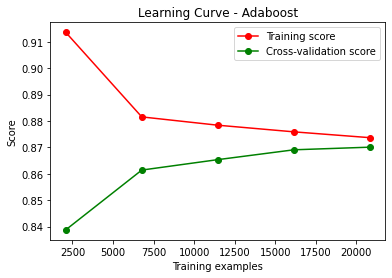

In [43]:
fig, ax = plt.subplots()
ax.set_title("Learning Curve - Adaboost")
ax.set_xlabel("Training examples")
ax.set_ylabel("Score")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
boost = boost_train(X_train, y_train)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(boost, X_train, y_train, cv=5,
                       return_times=True)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
ax.legend(loc="best")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:  3.7min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  8.0min finished


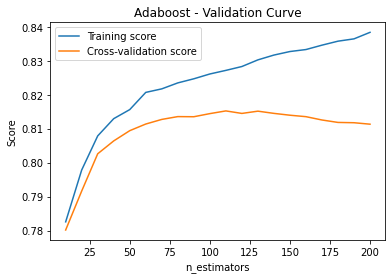

(array([[0.77900969, 0.78371851, 0.78327146, 0.78260688, 0.78418701],
        [0.79454905, 0.79131966, 0.80253702, 0.80048522, 0.80027773],
        [0.80341845, 0.80927326, 0.81151542, 0.80528985, 0.80993312],
        [0.80652154, 0.81395323, 0.81512128, 0.81518994, 0.81406921],
        [0.80920844, 0.81646195, 0.81908659, 0.81539827, 0.81805274],
        [0.81946921, 0.81817979, 0.82534371, 0.81981557, 0.82076091],
        [0.82050678, 0.819148  , 0.82606953, 0.82014848, 0.82289567],
        [0.82014405, 0.82202438, 0.82669535, 0.82280669, 0.82588883],
        [0.82304449, 0.82057622, 0.82825118, 0.82517416, 0.82655564],
        [0.82439408, 0.82238947, 0.83057203, 0.82606868, 0.82726956],
        [0.82405901, 0.82559003, 0.8308663 , 0.82647911, 0.82900682],
        [0.82570769, 0.82696491, 0.83206838, 0.827445  , 0.82951005],
        [0.82814254, 0.82888952, 0.83424937, 0.82929948, 0.83091494],
        [0.82847182, 0.83088786, 0.83549367, 0.83168815, 0.83203568],
        [0.82968672,

In [49]:
plot_validation_curve(X_train, y_train, 'n_estimators', range(10, 210, 10), 
                      fig_name="max_depth_vc.png", scorer=lambda a, x, y: get_f1_score(a, x, y))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:   31.8s remaining:   29.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   56.1s finished


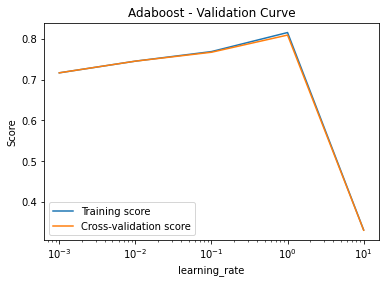

(array([[0.71611065, 0.71352403, 0.71696945, 0.71668696, 0.71987279],
        [0.7459645 , 0.74138729, 0.74621863, 0.74492008, 0.74820015],
        [0.77048169, 0.76678781, 0.77060372, 0.76679605, 0.76957727],
        [0.80920844, 0.81646195, 0.81908659, 0.81539827, 0.81805274],
        [0.33178741, 0.32799894, 0.331069  , 0.33204262, 0.32941998]]),
 array([[0.71871019, 0.72913673, 0.71528312, 0.71638962, 0.70374389],
        [0.74265923, 0.76121948, 0.74188778, 0.74706525, 0.73380306],
        [0.76324467, 0.77557025, 0.76679406, 0.76724066, 0.7631524 ],
        [0.80798166, 0.81956598, 0.80934166, 0.80434585, 0.80591738],
        [0.32725537, 0.34091933, 0.33012877, 0.32624117, 0.32476846]]))

In [50]:
plot_validation_curve(X_train, y_train, 'learning_rate', [1e-3, 1e-2, 1e-1, 1, 10], 
                      fig_name="max_depth_vc.png", xscale="log", scorer=lambda a, x, y: get_f1_score(a, x, y))

In [51]:
boost = boost_train(X_train, y_train, n=100, learning_rate=1)
get_f1_score(boost, X_test, y_test)

0.8129654966747526

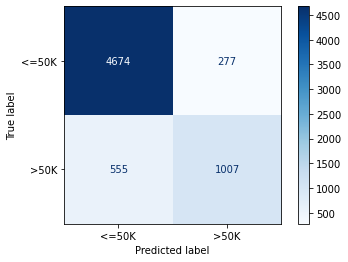

In [53]:
ax = plot_confusion_matrix(boost, X_test, y_test,
                                 display_labels=['<=50K',
                                 '>50K'],cmap=plt.cm.Blues, values_format='d')
plt.show()